# Une régression logisitique sur la reconnaissance de chiffres manuscrits

Parmi les dataset disponibles dans sklearn, il y a un jeu de chiffres manuscrits.

On s'intéresse à des images, la première étape est donc donc de commrendre comment une image peut devenir une donnée que l'on pourra insérer dans notre modèle...

Chaque élément du jeu de données est une image de 8x8 donc 64 informations : chaque information étant la couleur (ou le niveau de gris plutôt) de chaque pixel. Il y a 10 classes (pour les 10 chiffres) et environ 180 images par classes.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Import des données

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

In [5]:
#affichage sous forme de dataframe pour mieux voir nos données
pd.DataFrame(digits.data, columns=['pixel_'+ str(i) for i in range(1,65)])

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,pixel_64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Affichage des images du jeu de données et des labels associés

Définir une fonction qui permet d'afficher le nombre d'images du jeu de données que l'on souhaite. Vous aurez besoin de `plt.imshow`

In [6]:
def afficher_images(nb_images_a_afficher, nb_colonnes=5):
    nb_lignes = nb_images_a_afficher//nb_colonnes+1

    plt.figure(figsize=(20,5*nb_lignes))
    for index, (image, label) in enumerate(zip(X[0:nb_images_a_afficher], y[0:nb_images_a_afficher])):
        plt.subplot(nb_lignes, nb_colonnes, index + 1)
        plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
        plt.title('Training: %i\n' % label, fontsize = 15)

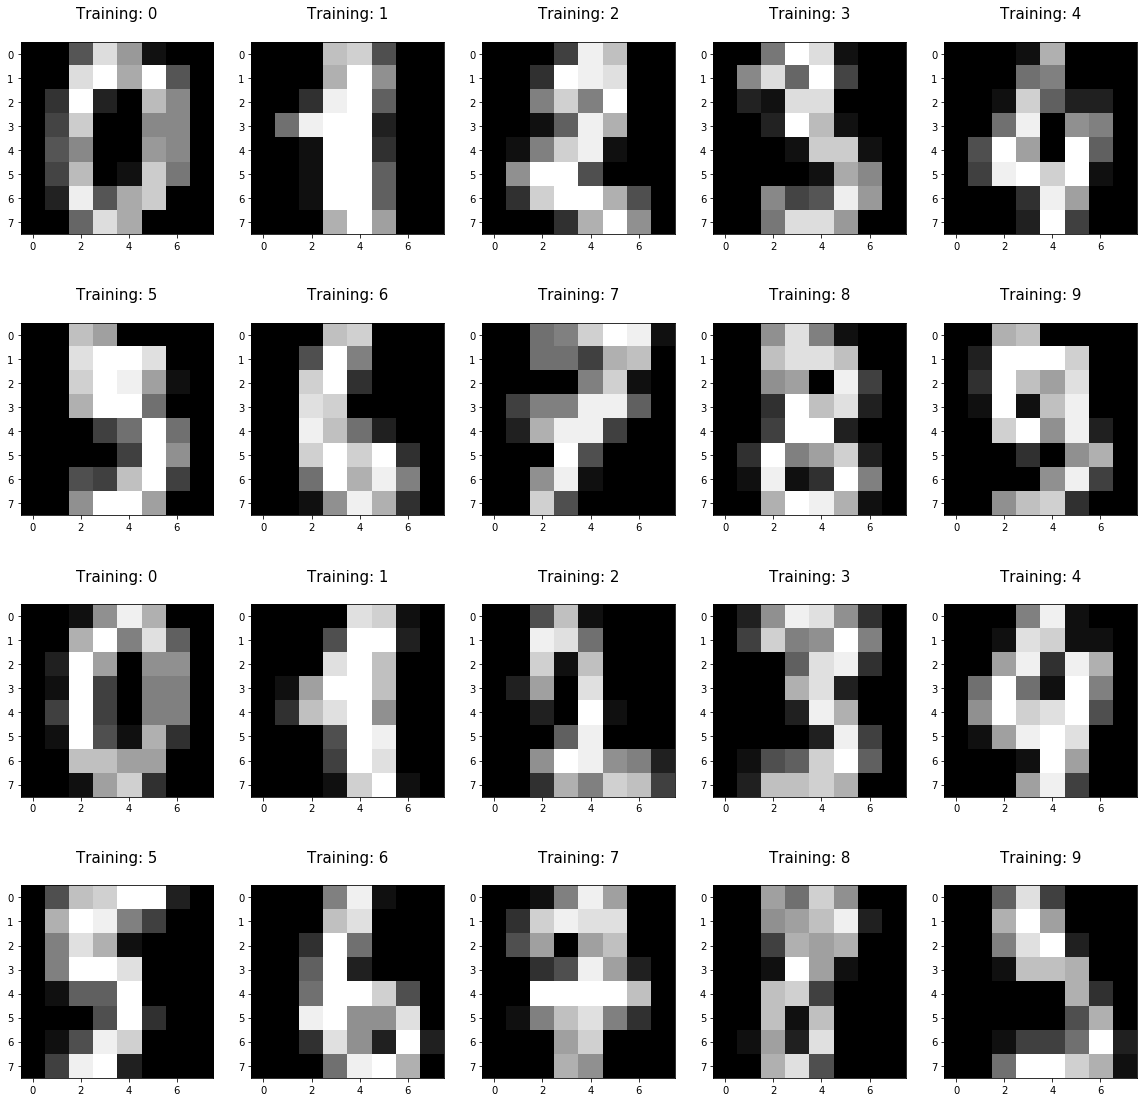

In [7]:
afficher_images(20)

## Training and Test Sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1347, 64) (1347,) (450, 64) (450,)


## La régression logistique

In [10]:
# 1.import du modèle
from sklearn.linear_model import LogisticRegression 
# 2.instanciation du modèle
reglog = LogisticRegression()
# 3.entrainement du modèle 
reglog.fit(X_train, y_train)
# 4.prédictions
reglog.predict(X_test[0].reshape(1,-1)) # de un élément
reglog.predict(X_test[0:10]) # de plusieurs éléments
y_pred = reglog.predict(X_test) # de tout le set de test
y_pred.shape

/home/elka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(450,)

## Évaluation du modèle

### Accuracy

In [11]:
# La méthdode scor du modèle renvoie l'accuracy
score = reglog.score(X_test, y_test)
score

0.9511111111111111

### Precision et recall

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



### La matrice de confusion

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  1, 40,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

In [14]:
# affichage sous forme de dataframe
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in reglog.classes_])
cm.index = ['vrai ' + str(_) for _ in reglog.classes_]
cm

,prédit 0,prédit 1,prédit 2,prédit 3,prédit 4,prédit 5,prédit 6,prédit 7,prédit 8,prédit 9
vrai 0,37,0,0,0,0,0,0,0,0,0
vrai 1,0,40,0,0,0,0,0,0,2,1
vrai 2,0,1,40,3,0,0,0,0,0,0
vrai 3,0,0,0,43,0,0,0,0,1,1
vrai 4,0,0,0,0,37,0,0,1,0,0
vrai 5,0,0,0,0,0,46,0,0,0,2
vrai 6,0,1,0,0,0,0,51,0,0,0
vrai 7,0,0,0,1,1,0,0,46,0,0
vrai 8,0,3,1,0,0,0,0,0,43,1
vrai 9,0,0,0,0,0,1,0,0,1,45


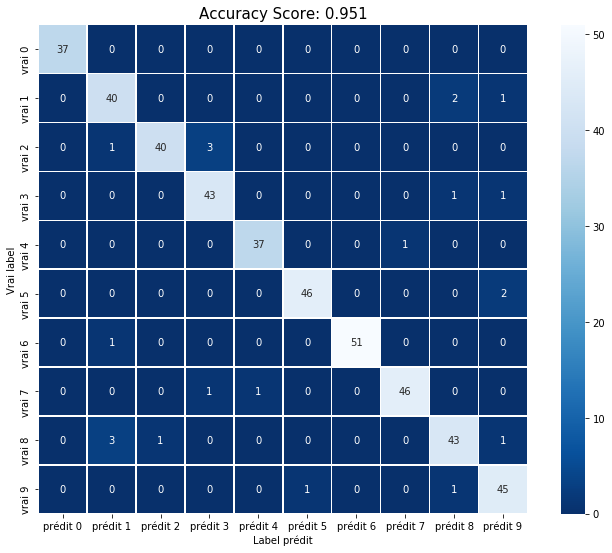

In [15]:
# affichage sous forme de graphique avec sns.heatmap
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Vrai label');
plt.xlabel('Label prédit');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

## Affichage des images qui ont été mal classées

Essayer de faire d'afficher les images quion été mal classées avec leurs labels prédit et vrai.

In [16]:
mal_classees = []
for index, (pred, vrai) in enumerate(zip(y_pred, y_test)):
    if pred != vrai: 
        mal_classees.append(index)
mal_classees

[56,
 94,
 118,
 124,
 130,
 169,
 181,
 196,
 213,
 235,
 251,
 315,
 325,
 331,
 335,
 378,
 398,
 415,
 425,
 429,
 430,
 440]

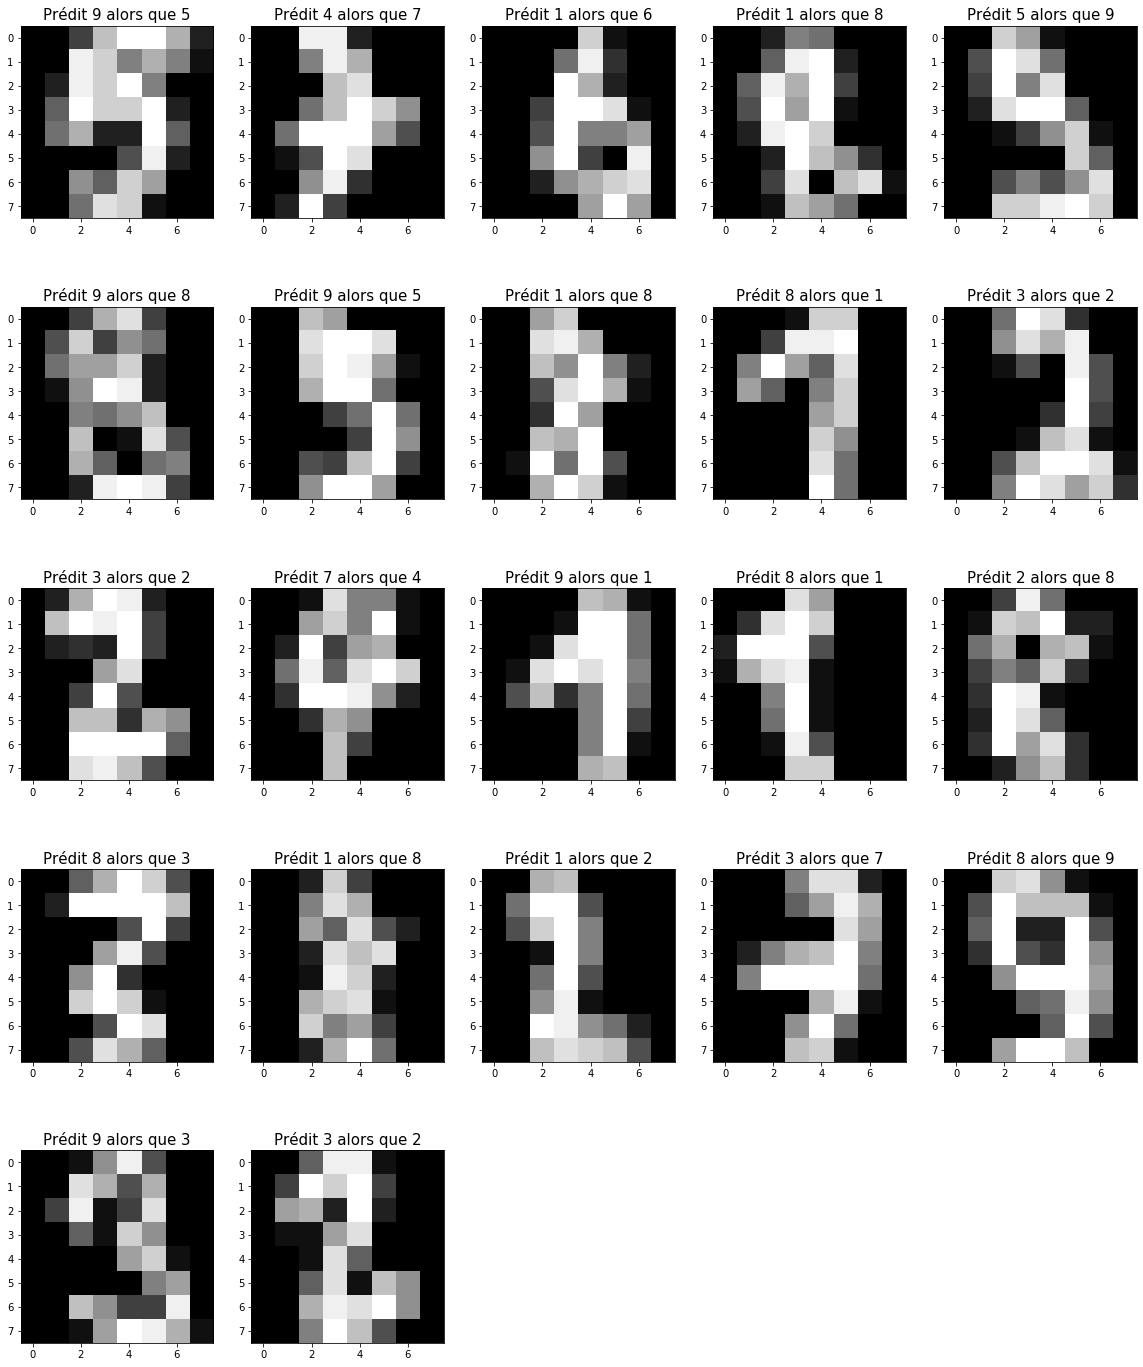

In [17]:
nb_colonnes=5
nb_images_a_afficher = len(mal_classees)
nb_lignes = nb_images_a_afficher//nb_colonnes+1

plt.figure(figsize=(20,5*nb_lignes))
for i in range(nb_images_a_afficher):
    idx_image = mal_classees[i]
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.reshape(X_test[idx_image], (8,8)), cmap=plt.cm.gray)
    plt.title('Prédit {} alors que {}'.format(y_pred[idx_image], y_test[idx_image]), fontsize = 15)